Data Visualization III 
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as: 
1. List down the features and their types (e.g., numeric, nominal) available in the dataset. 
2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
3. Create a box plot for each feature in the dataset. 
4. Compare distributions and identify outliers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IRIS.csv")


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

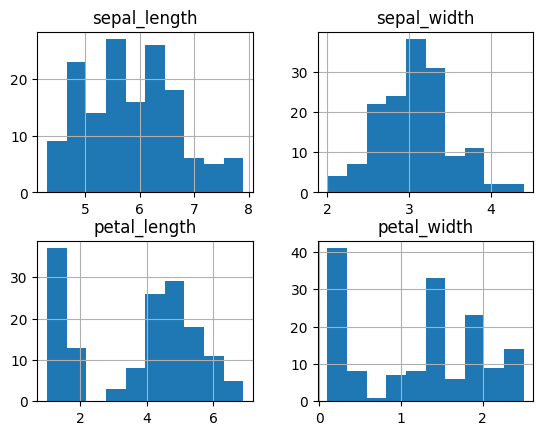

In [11]:
#2Create a histogram for each feature in the dataset to illustrate the feature distributions. 
df.hist()

<Axes: >

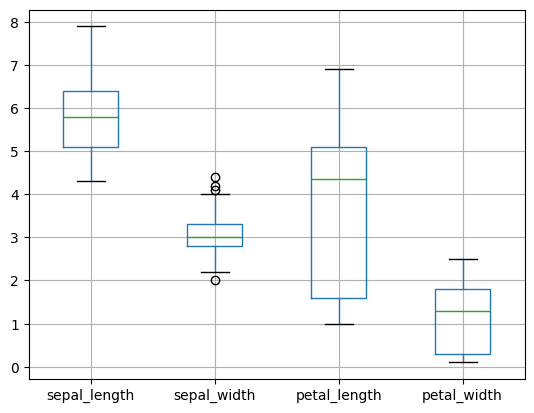

In [12]:
# 3. Create a box plot for each feature in the dataset.
df.boxplot()

Text(0, 0.5, 'frequency')

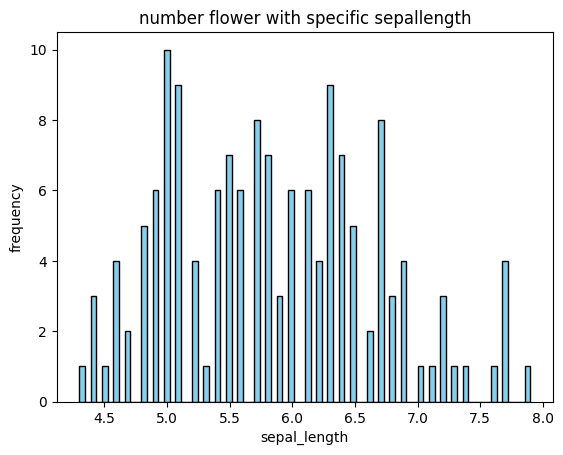

In [17]:
sepal_length = df['sepal_length'].dropna()

plt.hist(sepal_length,bins =80,color='skyblue',edgecolor='black')
plt.title("number flower with specific sepallength")
plt.xlabel("sepal_length")
plt.ylabel("frequency")

In [16]:
n_df = df.groupby('species')
print(n_df.describe().to_string())

                sepal_length                                             sepal_width                                               petal_length                                              petal_width                                          
                       count   mean       std  min    25%  50%  75%  max       count   mean       std  min    25%  50%    75%  max        count   mean       std  min  25%   50%    75%  max       count   mean       std  min  25%  50%  75%  max
species                                                                                                                                                                                                                                           
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4         50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9        50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6
Iris-versicolor         50.0

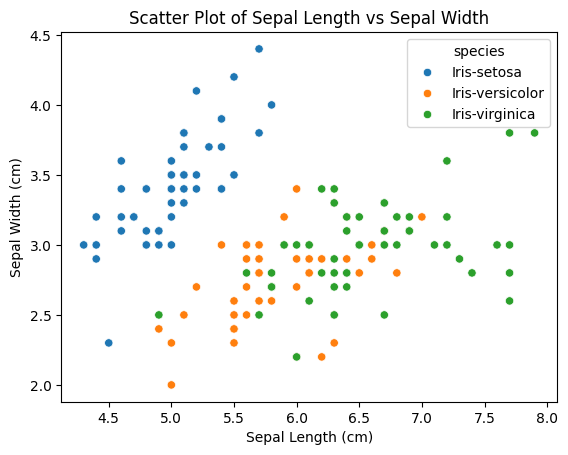

In [18]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

<Axes: xlabel='species', ylabel='petal_length'>

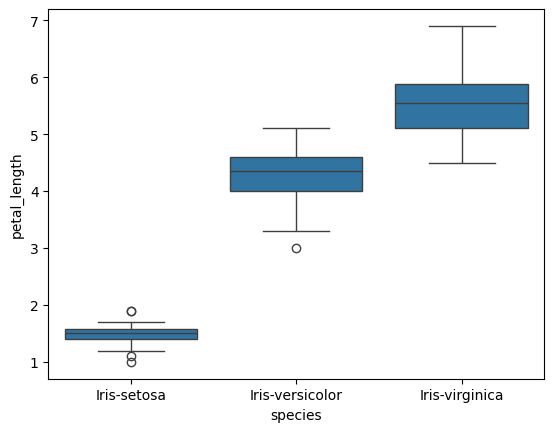

In [26]:

sns.boxplot(data =df,x='species' ,y='petal_length')

In [33]:
#4.indetify lower bound and uper bound and outlier
def indentify_outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3-Q1

    lowerbound = Q1-1.5*IQR
    upperbound = Q3+1.5*IQR
    print(f"the lowerbound of {feature} is {lowerbound} and upperbound is {upperbound}")
    
    outliers = df[(df[feature]<lowerbound)|(df[feature]>upperbound)]
    return outliers

for feature in df.columns[:-1]:
    outliers = indentify_outliers(df,feature)
    print(outliers)


the lowerbound of sepal_length is 3.1499999999999986 and upperbound is 8.350000000000001
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
the lowerbound of sepal_width is 2.05 and upperbound is 4.05
    sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor
the lowerbound of petal_length is -3.649999999999999 and upperbound is 10.349999999999998
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
the lowerbound of petal_width is -1.95 and upperbound is 4.05
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
